In [1]:
import pandas as pd

df = pd.read_csv('ddeul_comments.csv')

# 한 줄로 다 합치기
text = ' '.join(df.iloc[:, 0].astype(str).tolist())
print(text[:100])

-°○°- ,별의아이 겨울신화 아앙아ㅏㅇ아ㅏㄱ각아앙아각 ! !!! !고따봉고뒤집고따봉고뒤집 ?? ??: 9년 기념으로 힐링물 가자!!!.. ㅔ ? ??:10주년까지 얼마나 남음?<


In [2]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

In [3]:
from emoji import core
import re

def remove_emojis(string) :
    text = core.replace_emoji(string)
    text = re.sub(r'\[.*?\]', '', text)
    return text

In [4]:
tag_removed_text = remove_html_tags(text)
print(tag_removed_text[:100])
emoji_removed_text = remove_emojis(tag_removed_text)
print(emoji_removed_text[:100])

-°○°- ,별의아이 겨울신화 아앙아ㅏㅇ아ㅏㄱ각아앙아각 ! !!! !고따봉고뒤집고따봉고뒤집 ?? ??: 9년 기념으로 힐링물 가자!!!.. ㅔ ? ??:10주년까지 얼마나 남음??
-°○°- ,별의아이 겨울신화 아앙아ㅏㅇ아ㅏㄱ각아앙아각 ! !!! !고따봉고뒤집고따봉고뒤집 ?? ??: 9년 기념으로 힐링물 가자!!!.. ㅔ ? ??:10주년까지 얼마나 남음??


In [5]:
def remove_special_chars(text):
    return re.sub(r'[ㄱ-ㅎㅏ-ㅣ]+', '', text)

clean_text = remove_special_chars(emoji_removed_text)
print(clean_text[:500])

-°○°- ,별의아이 겨울신화 아앙아아각아앙아각 ! !!! !고따봉고뒤집고따봉고뒤집 ?? ??: 9년 기념으로 힐링물 가자!!!..  ? ??:10주년까지 얼마나 남음????:지금은 9주년인데? 1년 남음??:그렇9나 ???: 준비물 있어요?아뇨 없어요 ???: 아 있었는데? 아뇨 없어요 그냥 ???:77명을 못 구했다고? 아싸네  ???:뒤에서1등인 펭귄팀 ???:모든 것을 그곳에 두고왔다. ???:선생님 저는 친구가 없는데요? ???:우렙우렙우렙  네 여러분  오늘 핼 볼 모드는...가  몇년전이지? ?????? 벌써 9주년이라고? 8주년이 엊그제 같은데  진짜 오래됐나봐요!!! 지금도 응원합니다 잠뜰님!!! ?초2부터 봤는데 지금 중2네 . ... 이 순서대로 다시 몰아봐야겠네요.. 솔직히 뜰님이 많이하셔갔고 몇개는 잊어버리셨을거라 생각했는데.... 추억이네요..!! ... 친구 없다구용!!!  ...? 7주년이 어제 같은데 벌써 9주년이라뇨. ! 9주년 정말 축하드립니다. 1


In [6]:
from konlpy.tag import Okt
t = Okt()

pos_tags = t.pos(clean_text)
tokens_comments = [word for word, pos in pos_tags if pos in ['Noun', 'Adjective']]

print(tokens_comments[:100])


['의아', '겨울', '신화', '아앙', '각', '고', '봉고', '봉고', '기념', '힐링', '물', '주년', '얼마나', '지금', '주년', '그렇', '나', '준비물', '있어요', '아뇨', '없어요', '있었는데', '아뇨', '없어요', '그냥', '명', '못', '구', '뒤', '펭귄', '팀', '모든', '것', '곳', '선생님', '저', '친구', '없는데요', '우렙우렙우렙', '네', '여러분', '오늘', '핼', '볼', '모드', '년', '전이', '벌써', '주년', '주년', '엊그제', '같은데', '진짜', '지금', '응원', '잠뜰', '초', '부터', '지금', '중', '네', '이', '순서대로', '다시', '솔직히', '뜰', '몇개', '생각', '추억', '요', '친구', '없다구', '용', '주년', '어제', '같은데', '벌써', '주년', '뇨', '주년', '정말', '축하', '주년', '그냥', '쩔어요', '선생님', '준비물', '구', '없어', '난', '항상', '잠뜰', '방송', '실시간', '가지', '자', '진짜', '여기', '더', '슬프다']


In [7]:
tokens_comments = [token for token in tokens_comments if len(token) > 1]

print(tokens_comments[:100])

['의아', '겨울', '신화', '아앙', '봉고', '봉고', '기념', '힐링', '주년', '얼마나', '지금', '주년', '그렇', '준비물', '있어요', '아뇨', '없어요', '있었는데', '아뇨', '없어요', '그냥', '펭귄', '모든', '선생님', '친구', '없는데요', '우렙우렙우렙', '여러분', '오늘', '모드', '전이', '벌써', '주년', '주년', '엊그제', '같은데', '진짜', '지금', '응원', '잠뜰', '부터', '지금', '순서대로', '다시', '솔직히', '몇개', '생각', '추억', '친구', '없다구', '주년', '어제', '같은데', '벌써', '주년', '주년', '정말', '축하', '주년', '그냥', '쩔어요', '선생님', '준비물', '없어', '항상', '잠뜰', '방송', '실시간', '가지', '진짜', '여기', '슬프다', '슬픈지', '브금', '연출', '슬퍼', '아니', '마지막', '점점', '이제', '진짜', '복귀군', '마음', '아아', '행복할', '원래', '언니', '있어서', '좋았지만', '잠뜰', '채널', '지금', '이제', '주년', '잠뜰', '주년', '가야', '여기', '메리', '골드']


In [8]:
comments_cnt = {}
for word in tokens_comments:
    comments_cnt[word] = comments_cnt.get(word, 0) + 1

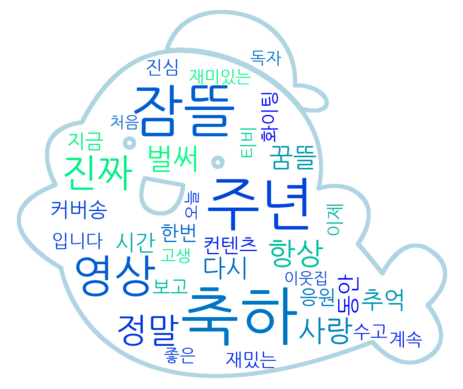

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

ryong_mask = np.array(Image.open("ddeul_vector.png"))

plt.rc('font', family='NanumGothic')

font_path = "./NanumGothic.ttf"

wordcloud = WordCloud(
    font_path=font_path,
    max_font_size=200,
    min_font_size=50,
    mask=ryong_mask,
    width=800,
    height=400,
    contour_width=25,
    contour_color='#B0D5E2',
    background_color='white',
    colormap="winter",
    max_words=100
)

wordcloud.generate_from_frequencies(comments_cnt)

wordcloud.to_file('ddeul_with_mask.png')

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

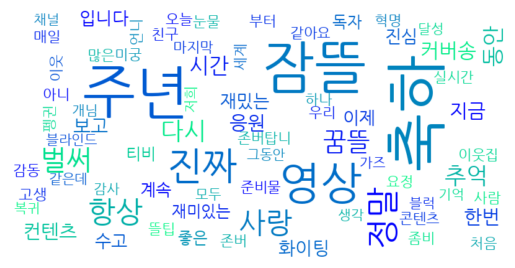

In [13]:
wordcloud = WordCloud(
    font_path=font_path,
    max_font_size=100,
    width=800,
    height=400,
    background_color='white',
    max_words=100,
    colormap="winter",
)

wordcloud.generate_from_frequencies(comments_cnt)

wordcloud.to_file('ddeul_wordcloud.png')

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()